In [4]:
## Data Ingestion

In [2]:
import pandas as pd

# Load the dataset (Border Crossing Entry data from data.gov)
url = 'https://data.transportation.gov/api/views/keg4-3bc2/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


       Port Name    State  Port Code            Border      Date Measure  \
0           Roma    Texas       2310  US-Mexico Border  Dec 2023   Buses   
1        Del Rio    Texas       2302  US-Mexico Border  Dec 2023  Trucks   
2           Roma    Texas       2310  US-Mexico Border  Nov 2023  Trucks   
3        Douglas  Arizona       2601  US-Mexico Border  Oct 2023   Buses   
4  Beecher Falls  Vermont        206  US-Canada Border  Aug 2023  Trucks   

   Value  Latitude  Longitude                          Point  
0     46    26.404    -99.019   POINT (-99.018981 26.403928)  
1   6552    29.327   -100.928  POINT (-100.927612 29.326784)  
2   3753    26.404    -99.019   POINT (-99.018981 26.403928)  
3     13    31.334   -109.560  POINT (-109.560344 31.334043)  
4    422    45.013    -71.505   POINT (-71.505309 45.013411)  


In [9]:
## Data Wrangling

In [3]:
# Check for missing values

print(df.isnull().sum())

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     0
Longitude    0
Point        0
dtype: int64


In [10]:
## Data Transformation

In [8]:
# Split the 'Date' column into 'Month' and 'Year' columns

df[['Month', 'Year']] = df['Date'].str.split(' ', expand=True)

# Delete the 'Date' column
df.drop(columns=['Date'], inplace=True)

print(df.head())

       Port Name    State  Port Code            Border Measure  Value  \
0           Roma    Texas       2310  US-Mexico Border   Buses     46   
1        Del Rio    Texas       2302  US-Mexico Border  Trucks   6552   
2           Roma    Texas       2310  US-Mexico Border  Trucks   3753   
3        Douglas  Arizona       2601  US-Mexico Border   Buses     13   
4  Beecher Falls  Vermont        206  US-Canada Border  Trucks    422   

   Latitude  Longitude                          Point Month  Year  
0    26.404    -99.019   POINT (-99.018981 26.403928)   Dec  2023  
1    29.327   -100.928  POINT (-100.927612 29.326784)   Dec  2023  
2    26.404    -99.019   POINT (-99.018981 26.403928)   Nov  2023  
3    31.334   -109.560  POINT (-109.560344 31.334043)   Oct  2023  
4    45.013    -71.505   POINT (-71.505309 45.013411)   Aug  2023  


In [11]:
## Data Storage

In [16]:
# Transferring the data to AWS S3
# Create a user in AWS root account and retrive the access key for that user

import s3fs
# key = ' '
# secret = ' '

bytes_to_write = df.to_csv(None).encode()
fs = s3fs.S3FileSystem(key=key, secret=secret)
with fs.open('s3://border-crossing-entry-data-project-etl/outputdata/output.csv', 'wb') as f:
    f.write(bytes_to_write)


# df.to_csv('s3://border-crossing-entry-data-project-etl/outputdata/', index = False)

In [17]:
# Data Analysis and Visualization

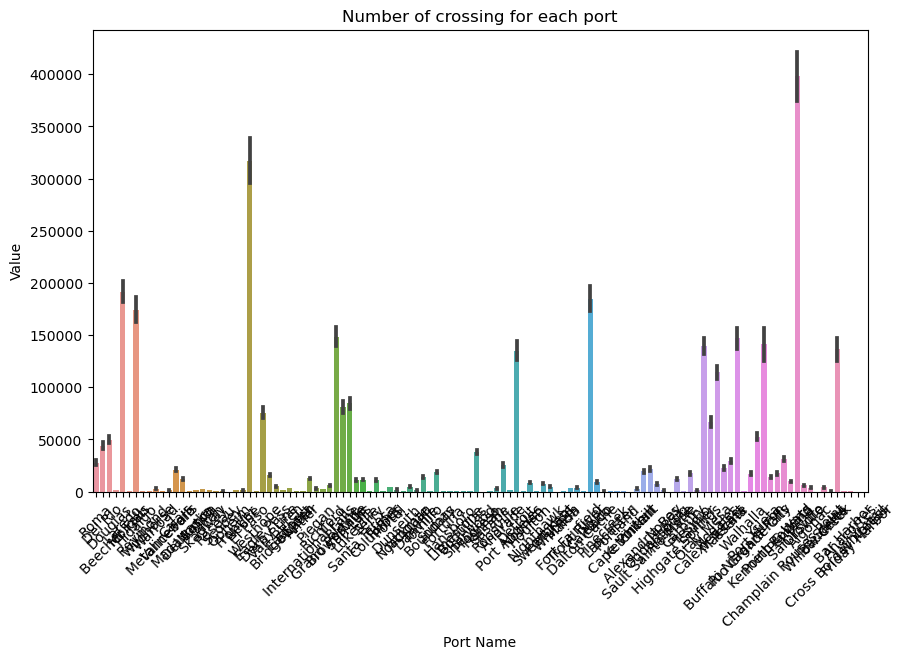

In [23]:
# Create a Bar Chart for Number of crossing for each port

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x='Port Name', y='Value', data=df)
plt.title('Number of crossing for each port')
plt.xlabel('Port Name')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

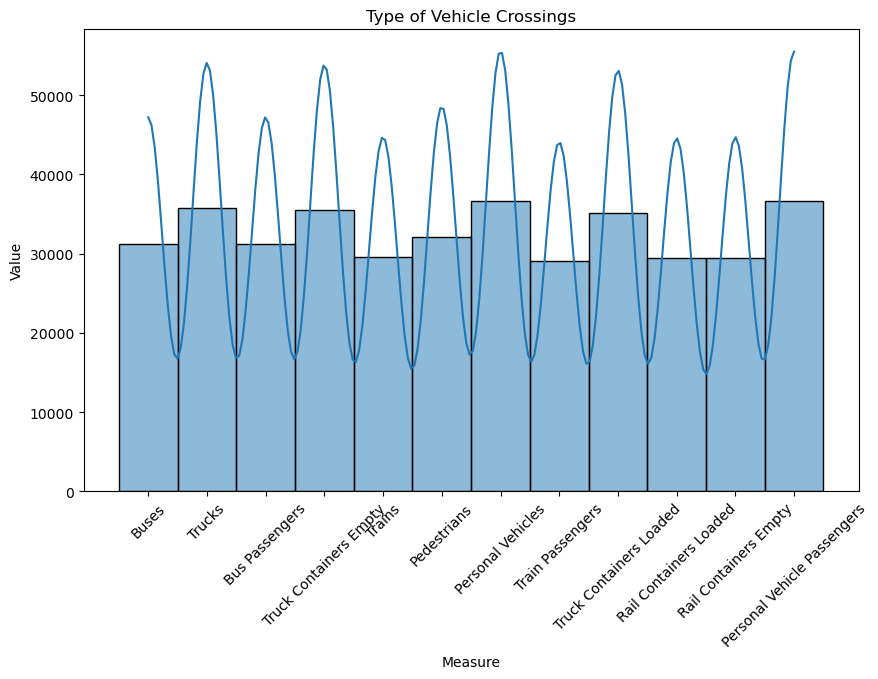

In [22]:
# Create a Histogram for the type of vehicle crossings

plt.figure(figsize=(10, 6))
sns.histplot(df['Measure'], bins=50, kde=True)
plt.title('Type of Vehicle Crossings')
plt.xlabel('Measure')
plt.ylabel('Value')
plt.xticks(rotation=45) 
plt.show()